In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import normalized_mutual_info_score as nmi
import datetime as dt
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import preprocessing
from sklearn import neighbors
from sklearn.metrics import accuracy_score
from scipy.stats import chi2
np.random.seed(10)

In [60]:
weather = pd.read_csv('weather_data_daily1.csv', encoding ='unicode_escape')
display(weather.head())
weather.info()
weather.shape
weather.isnull().sum().sort_values(ascending=False)/weather.shape[0]

,Date,Max of TOTALDEMAND,Max of PRICECATEGORY,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Direction of maximum wind gust,Speed of maximum wind gust (km/h),...,9am cloud amount (oktas),9am wind direction,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa)
0,1/01/2021,5019.64,0,15.6,29.9,0.0,2.8,9.3,NNE,31,...,6,N,2,1018.8,28.1,43,5,E,13,1015.3
1,2/01/2021,4964.35,0,18.4,29.0,0.0,9.4,1.3,NNW,30,...,7,NNW,17,1013.3,28.7,38,7,SW,4,1008.5
2,3/01/2021,4503.31,0,17.0,26.2,12.6,4.8,7.1,WSW,33,...,8,WSW,4,1007.7,23.5,59,4,SSW,2,1005.2
3,4/01/2021,4764.18,0,16.0,18.6,2.6,3.8,0.0,SSE,41,...,8,SSE,11,1010.0,18.2,82,8,SSW,17,1011.0
4,5/01/2021,4800.64,0,15.9,19.1,11.2,1.0,0.0,SSE,35,...,8,SSE,13,1012.5,18.2,82,8,SSE,19,1013.3


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Date                               240 non-null    object 
 1   Max of TOTALDEMAND                 240 non-null    float64
 2   Max of PRICECATEGORY               240 non-null    int64  
 3   Minimum temperature (°C)           240 non-null    float64
 4   Maximum temperature (°C)           240 non-null    float64
 5   Rainfall (mm)                      240 non-null    float64
 6   Evaporation (mm)                   240 non-null    float64
 7   Sunshine (hours)                   240 non-null    float64
 8   Direction of maximum wind gust     240 non-null    object 
 9   Speed of maximum wind gust (km/h)  240 non-null    int64  
 10  Time of maximum wind gust          240 non-null    float64
 11  9am Temperature (°C)               240 non-null    float64

3pm MSL pressure (hPa)               0.0
Time of maximum wind gust            0.0
Max of TOTALDEMAND                   0.0
Max of PRICECATEGORY                 0.0
Minimum temperature (°C)             0.0
Maximum temperature (°C)             0.0
Rainfall (mm)                        0.0
Evaporation (mm)                     0.0
Sunshine (hours)                     0.0
Direction of maximum wind gust       0.0
Speed of maximum wind gust (km/h)    0.0
9am Temperature (°C)                 0.0
3pm wind speed (km/h)                0.0
9am relative humidity (%)            0.0
9am cloud amount (oktas)             0.0
9am wind direction                   0.0
9am wind speed (km/h)                0.0
9am MSL pressure (hPa)               0.0
3pm Temperature (°C)                 0.0
3pm relative humidity (%)            0.0
3pm cloud amount (oktas)             0.0
3pm wind direction                   0.0
Date                                 0.0
dtype: float64

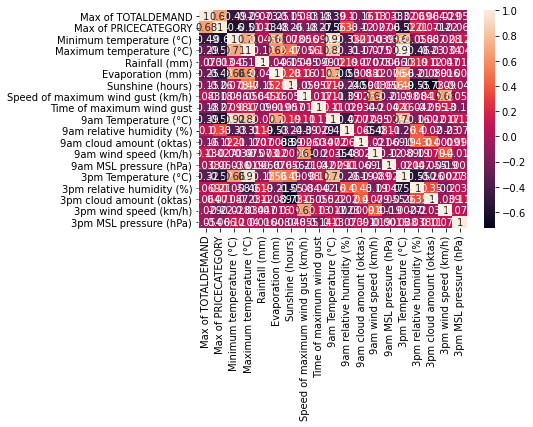

In [61]:
sns.heatmap(weather.corr(),annot = True);

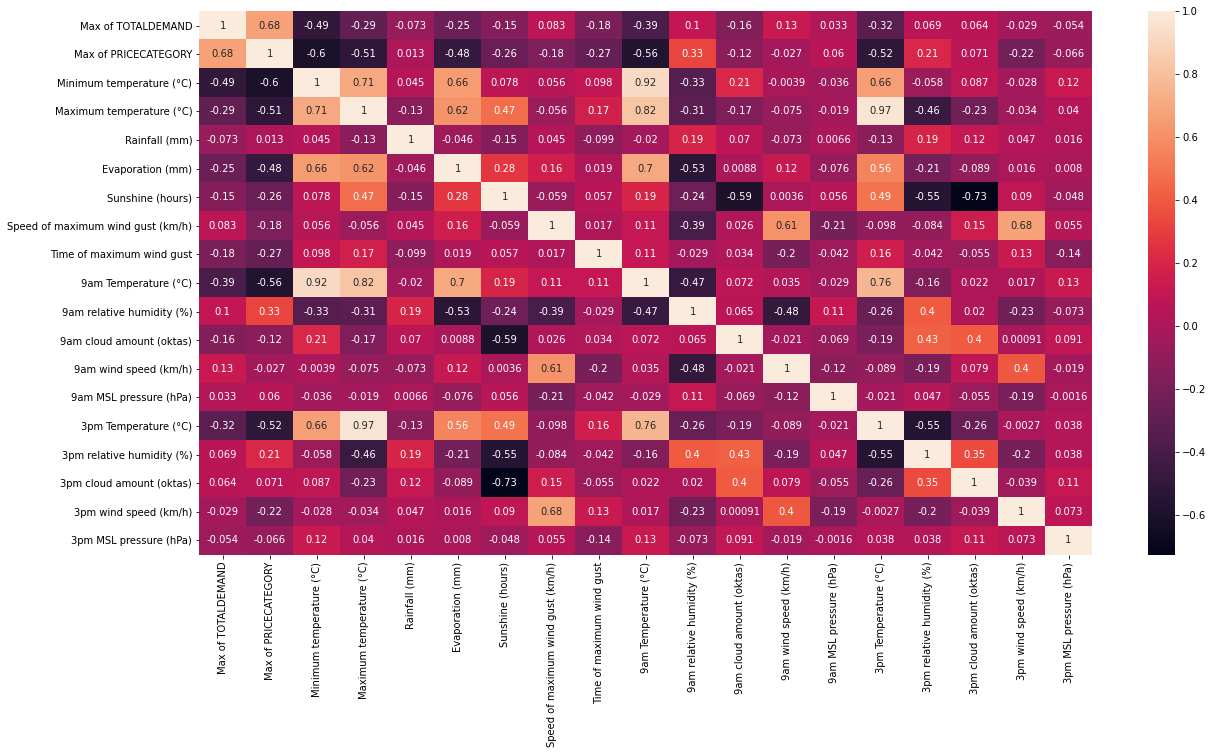

In [62]:
plt.figure(figsize=(20,10))
sns.heatmap(weather.corr(), annot = True);

<AxesSubplot:xlabel='Max of TOTALDEMAND', ylabel='Minimum temperature (°C)'>

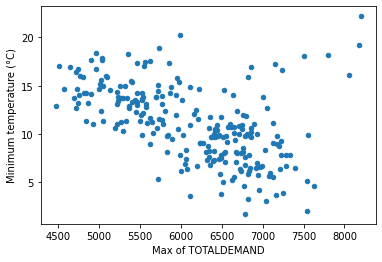

In [63]:
weather.plot.scatter(x = 'Max of TOTALDEMAND', y = 'Minimum temperature (°C)')

<AxesSubplot:xlabel='Max of TOTALDEMAND', ylabel='Maximum temperature (°C)'>

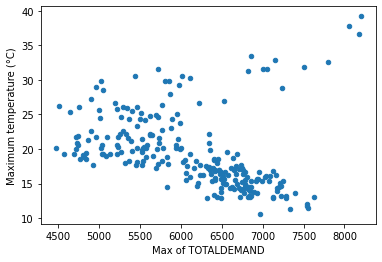

In [64]:
weather.plot.scatter(x = 'Max of TOTALDEMAND', y = 'Maximum temperature (°C)')

<AxesSubplot:xlabel='Max of TOTALDEMAND', ylabel='Rainfall (mm)'>

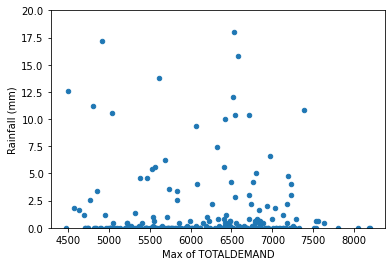

In [65]:
weather.plot.scatter(x = 'Max of TOTALDEMAND', y = 'Rainfall (mm)',ylim=(0,20))

<AxesSubplot:xlabel='Max of TOTALDEMAND', ylabel='Evaporation (mm)'>

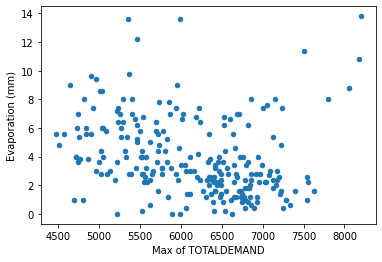

In [66]:
weather.plot.scatter(x = 'Max of TOTALDEMAND', y = 'Evaporation (mm)')

<AxesSubplot:xlabel='Max of TOTALDEMAND', ylabel='Sunshine (hours)'>

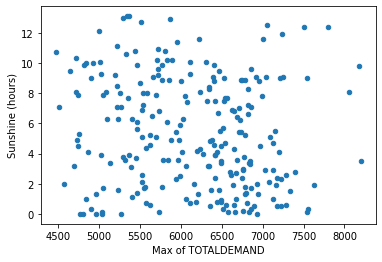

In [67]:
weather.plot.scatter(x = 'Max of TOTALDEMAND', y = 'Sunshine (hours)')

<AxesSubplot:xlabel='Max of TOTALDEMAND', ylabel='Direction of maximum wind gust '>

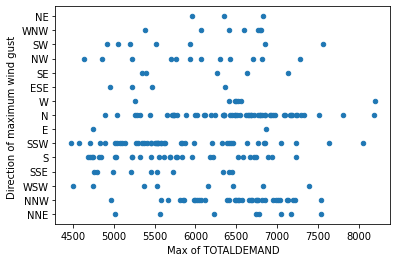

In [68]:
weather.plot.scatter(x = 'Max of TOTALDEMAND', y = 'Direction of maximum wind gust ')

<AxesSubplot:xlabel='Max of TOTALDEMAND', ylabel='Speed of maximum wind gust (km/h)'>

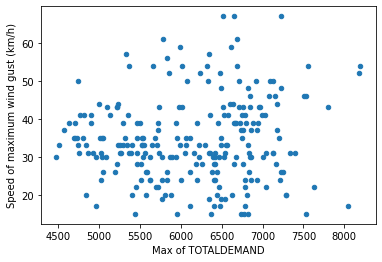

In [69]:
weather.plot.scatter(x = 'Max of TOTALDEMAND', y = 'Speed of maximum wind gust (km/h)')

<AxesSubplot:xlabel='Max of TOTALDEMAND', ylabel='Time of maximum wind gust'>

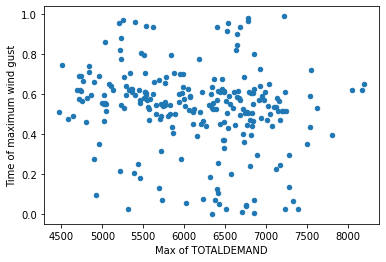

In [70]:
weather.plot.scatter(x = 'Max of TOTALDEMAND', y = 'Time of maximum wind gust')

<AxesSubplot:xlabel='Max of TOTALDEMAND', ylabel='9am Temperature (°C)'>

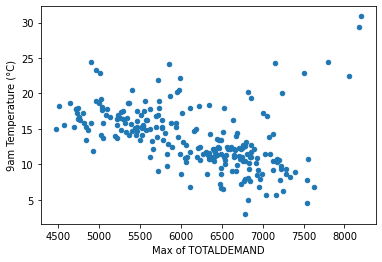

In [71]:
weather.plot.scatter(x = 'Max of TOTALDEMAND', y = '9am Temperature (°C)')

<AxesSubplot:xlabel='Max of TOTALDEMAND', ylabel='9am relative humidity (%)'>

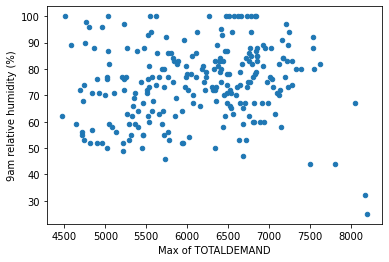

In [72]:
weather.plot.scatter(x = 'Max of TOTALDEMAND', y = '9am relative humidity (%)')

<AxesSubplot:xlabel='Max of TOTALDEMAND', ylabel='9am cloud amount (oktas)'>

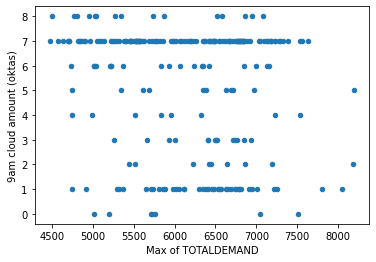

In [73]:
weather.plot.scatter(x = 'Max of TOTALDEMAND', y = '9am cloud amount (oktas)')

<AxesSubplot:xlabel='Max of TOTALDEMAND', ylabel='9am wind speed (km/h)'>

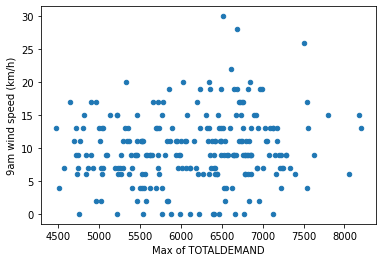

In [74]:
weather.plot.scatter(x = 'Max of TOTALDEMAND', y = '9am wind speed (km/h)')

<AxesSubplot:xlabel='Max of TOTALDEMAND', ylabel='9am MSL pressure (hPa)'>

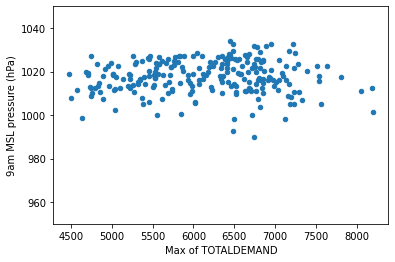

In [75]:
weather.plot.scatter(x = 'Max of TOTALDEMAND', y = '9am MSL pressure (hPa)',ylim=(950,1050))

<AxesSubplot:xlabel='Max of TOTALDEMAND', ylabel='3pm Temperature (°C)'>

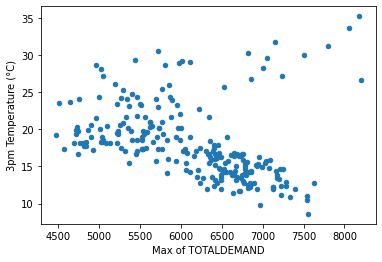

In [76]:
weather.plot.scatter(x = 'Max of TOTALDEMAND', y = '3pm Temperature (°C)')

<AxesSubplot:xlabel='Max of TOTALDEMAND', ylabel='3pm relative humidity (%)'>

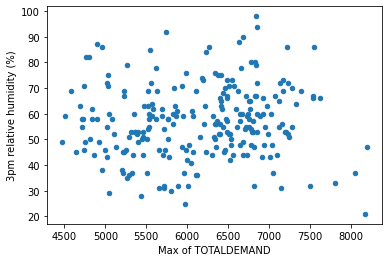

In [77]:
weather.plot.scatter(x = 'Max of TOTALDEMAND', y = '3pm relative humidity (%)')

<AxesSubplot:xlabel='Max of TOTALDEMAND', ylabel='3pm cloud amount (oktas)'>

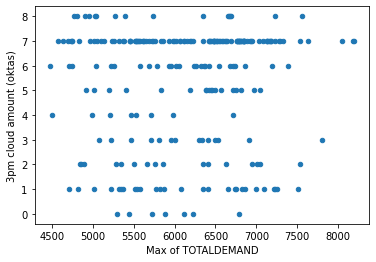

In [78]:
weather.plot.scatter(x = 'Max of TOTALDEMAND', y = '3pm cloud amount (oktas)')

<AxesSubplot:xlabel='Max of TOTALDEMAND', ylabel='3pm wind speed (km/h)'>

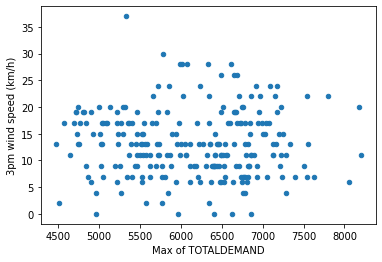

In [79]:
weather.plot.scatter(x = 'Max of TOTALDEMAND', y = '3pm wind speed (km/h)')

<AxesSubplot:xlabel='Max of TOTALDEMAND', ylabel='3pm MSL pressure (hPa)'>

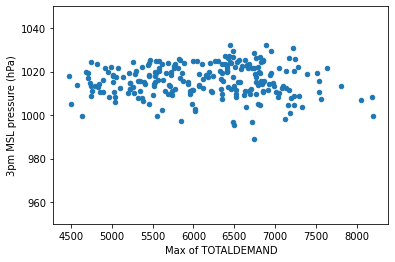

In [80]:
weather.plot.scatter(x = 'Max of TOTALDEMAND', y = '3pm MSL pressure (hPa)',ylim=(950,1050))

In [81]:
from sklearn.model_selection import KFold
print(weather['Max of PRICECATEGORY'].value_counts())



data = weather[['Minimum temperature (°C)','Maximum temperature (°C)','Rainfall (mm)','Evaporation (mm)','Sunshine (hours)','Speed of maximum wind gust (km/h)',\
              '9am Temperature (°C)','9am wind speed (km/h)','3pm Temperature (°C)','3pm wind speed (km/h)']].astype(float)

classlabel = weather['Max of PRICECATEGORY']

X_train, X_test, y_train, y_test = train_test_split(data,classlabel, train_size=0.8, random_state=42)

k = 10
kf = KFold(n_splits=k, shuffle= True, random_state = 42)
accuracy_scores=[]
for train_index, test_index in kf.split(weather):
    features_train = data.iloc[train_index, :]    
    features_test = data.iloc[test_index, :]
    
    class_train = classlabel[train_index]
    class_test = classlabel[test_index]
    
    scaler = preprocessing.StandardScaler().fit(X_train)
    X_train=scaler.transform(X_train)
    X_test=scaler.transform(X_test)
    knn = neighbors.KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train, y_train)
    
    y_pred=knn.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    

print(accuracy_scores)
print(sum(accuracy_scores)/k)


1    76
3    62
2    61
0    41
Name: Max of PRICECATEGORY, dtype: int64
[0.4375, 0.4375, 0.4375, 0.4375, 0.4375, 0.4375, 0.4375, 0.4375, 0.4375, 0.4375]
0.4375


In [82]:
##randomly select 80% of the instances to be training and the rest to be testing
X_train, X_test, y_train, y_test = train_test_split(data,classlabel, train_size=0.8, random_state=42)

#normalise the data to have 0 mean and unit variance using the library functions.  This will help for later
#computation of distances between instances
scaler = preprocessing.StandardScaler().fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)
knn = neighbors.KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [91]:
y_pred=knn.predict(X_test)
print(accuracy_score(y_test, y_pred))


0.4375


In [84]:
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
#create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=5)
#train model with cv of 5 
cv_scores = cross_val_score(knn_cv, data, classlabel, cv=5)
#print each cv score (accuracy) and average them
print(cv_scores)
#print(‘cv_scores mean:{}’.format(np.mean(cv_scores)))
print(f"cv_scores mean :{np.mean(cv_scores)}")

[0.41666667 0.5625     0.5        0.5        0.35416667]
cv_scores mean :0.4666666666666667


In [85]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion="entropy",random_state=42, max_depth=3)
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

In [86]:
y_predict=dt.predict(X_test)
print(accuracy_score(y_test, y_predict))

0.4583333333333333


[Text(697.5, 951.3000000000001, '3pm Temperature (°C) <= -0.228\nentropy = 1.987\nsamples = 192\nvalue = [38, 56, 48, 50]'),
 Text(348.75, 679.5, 'Speed of maximum wind gust (km/h) <= -0.361\nentropy = 1.464\nsamples = 90\nvalue = [0, 14, 35, 41]'),
 Text(174.375, 407.70000000000005, 'Sunshine (hours) <= -0.336\nentropy = 0.824\nsamples = 31\nvalue = [0, 0, 8, 23]'),
 Text(87.1875, 135.89999999999998, 'entropy = 0.982\nsamples = 19\nvalue = [0, 0, 8, 11]'),
 Text(261.5625, 135.89999999999998, 'entropy = 0.0\nsamples = 12\nvalue = [0, 0, 0, 12]'),
 Text(523.125, 407.70000000000005, 'Sunshine (hours) <= -0.601\nentropy = 1.531\nsamples = 59\nvalue = [0, 14, 27, 18]'),
 Text(435.9375, 135.89999999999998, 'entropy = 1.333\nsamples = 28\nvalue = [0, 3, 9, 16]'),
 Text(610.3125, 135.89999999999998, 'entropy = 1.241\nsamples = 31\nvalue = [0, 11, 18, 2]'),
 Text(1046.25, 679.5, 'Minimum temperature (°C) <= -0.261\nentropy = 1.746\nsamples = 102\nvalue = [38, 42, 13, 9]'),
 Text(871.875, 407.7

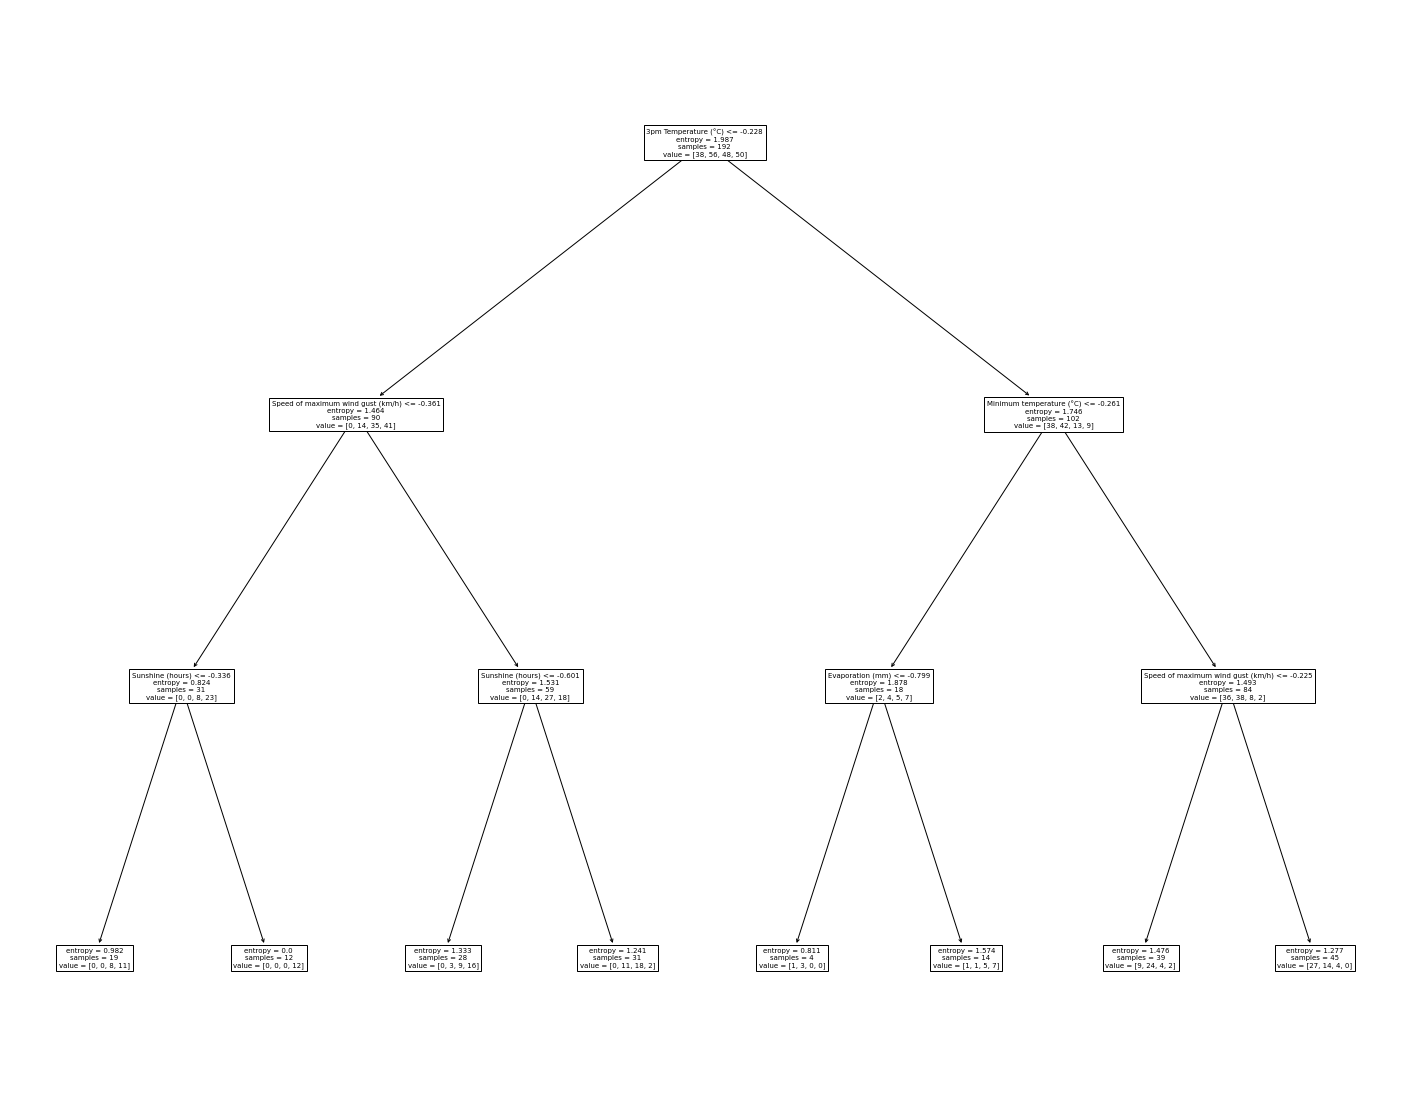

In [87]:
from sklearn import tree
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(25,20))
featurenames = ['Minimum temperature (°C)','Maximum temperature (°C)','Rainfall (mm)','Evaporation (mm)','Sunshine (hours)','Speed of maximum wind gust (km/h)',\
          '9am Temperature (°C)','9am wind speed (km/h)','3pm Temperature (°C)','3pm wind speed (km/h)']
tree.plot_tree(dt, feature_names=featurenames)

In [129]:
##  Example
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


X= weather[['Minimum temperature (°C)','Maximum temperature (°C)','Evaporation (mm)','Sunshine (hours)','Speed of maximum wind gust (km/h)',\
          '9am Temperature (°C)','9am wind speed (km/h)','9am MSL pressure (hPa)','3pm Temperature (°C)',\
          '3pm wind speed (km/h)','3pm MSL pressure (hPa)']].astype(float)

y = weather['Max of TOTALDEMAND']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# partial code here...
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
y_test_predictions = lm.predict(X_test)
print('actual TOTALDEMAND values of the first 5 test data:')
print(y_test[0:5])
print('')
print('predicted TOTALDEMAND values of the first 5 test data:')
print(y_test_predictions[0:5])
print('')

# coefficients

print('Coefficients: ', end = ' ')
print(lm.coef_)
print('')

# intercept:
print('Intercept: ', end = ' ')
print(lm.intercept_)
print('')

# R^2
r2_test = lm.score(X_test, y_test)
r2_train = lm.score(X_train, y_train)

print('Coefficient of determination (test): {0:.2f}'.format(r2_test))
print('Coefficient of determination (training): {0:.2f}'.format(r2_train))



actual TOTALDEMAND values of the first 5 test data:
184    7629.77
98     5366.73
129    6578.07
159    6516.17
26     5398.66
Name: Max of TOTALDEMAND, dtype: float64

predicted TOTALDEMAND values of the first 5 test data:
[6900.23697769 6094.6843037  6241.0085516  7044.80814314 5883.95619426]

Coefficients:  [-1.80462190e+02  1.19062647e+02  1.33641492e+01 -5.40854160e+01
  8.62466757e+00  3.24976129e+01  1.30354846e+01  5.08417007e-01
 -8.52546157e+01 -1.34329508e+01  1.45168102e-01]

Intercept:  6232.493198136807

Coefficient of determination (test): 0.38
Coefficient of determination (training): 0.34


In [130]:
r2_test = lm.score(X_test, y_test)
print(r2_test)

0.37843040367346314
